<a href="https://colab.research.google.com/github/agarwalpratik/aiml/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
data = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [108]:
#Inspect the data manually to identify missing or incorrect
#information using the functions isna() and notna().

In [109]:
data.isna().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [110]:
data.notna().sum()

,0
Date,7560
Time,7560
State,7560
Group,7560
Unit,7560
Sales,7560


In [111]:
pd.set_option('display.float_format','{:.2f}'.format)
data.describe()

,Unit,Sales
count,7560.00,7560.00
mean,18.01,45013.56
std,12.90,32253.51
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,26.00,65000.00
max,65.00,162500.00


In [112]:
#Based on your knowledge of data analytics, include your
#recommendations for treating missing and incorrect data (dropping the
#null values or filling them).

#No missing or null data present

In [113]:
#Choose a suitable data wrangling technique—either data standardization
#or normalization. Execute the preferred normalization method and
#present the resulting data.

In [114]:
#Goal: Identify the extreme values and remove the same
# To identify extreme value we need to identify the range
# To identify the range, we will use 1.5 IQR rule (Tukey's Method)
import numpy as np

def outlierDetection(column):
  #1. Sort the data in ascending order
  sorted(column)

  #2. Calc Q1 and Q3
  Q1,Q3 = np.percentile(column,[25,75])

  #3. Calc IQR
  IQR = Q3 - Q1

  #4. Calc Valid Range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [115]:
import seaborn as sns

<ipython-input-116-4cc14510bd62>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Unit', ylabel='Density'>

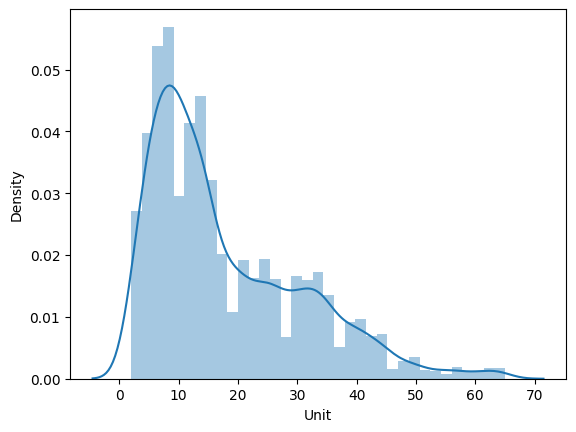

In [116]:
sns.distplot(data['Unit'])

In [117]:
lr_unit,ur_unit = outlierDetection(data['Unit'])
lr_unit,ur_unit

(-19.0, 53.0)

In [118]:
#Delete Outliers

processedData = data[(data['Unit'] >= lr_unit) & (data['Unit'] <= ur_unit)]

In [119]:
processedData.describe()

,Unit,Sales
count,7437.00,7437.00
mean,17.32,43292.66
std,11.83,29565.26
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,25.00,62500.00
max,53.00,132500.00


<ipython-input-120-305adbbc9c27>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Unit', ylabel='Density'>

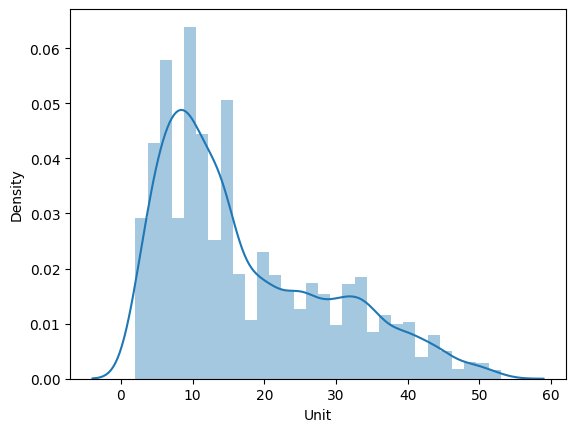

In [120]:
sns.distplot(processedData['Unit'])

<ipython-input-121-b4353a8201f0>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Sales', ylabel='Density'>

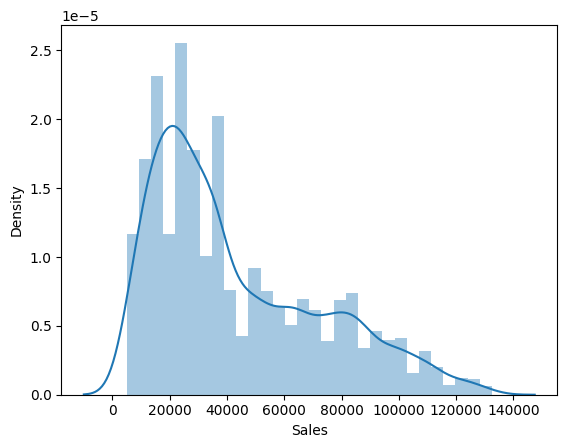

In [121]:
sns.distplot(processedData['Sales'])

In [122]:
lr_sales,ur_sales = outlierDetection(processedData['Sales'])
lr_sales,ur_sales

(-43750.0, 126250.0)

In [123]:
#Delete Outliers

processedDataFinal = processedData[(processedData['Sales'] >= lr_sales) & (processedData['Sales'] <= ur_sales)]

In [124]:
processedDataFinal.describe()

,Unit,Sales
count,7409.00,7409.00
mean,17.19,42964.98
std,11.65,29135.36
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,25.00,62500.00
max,50.00,125000.00


<ipython-input-125-19248724b783>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Sales', ylabel='Density'>

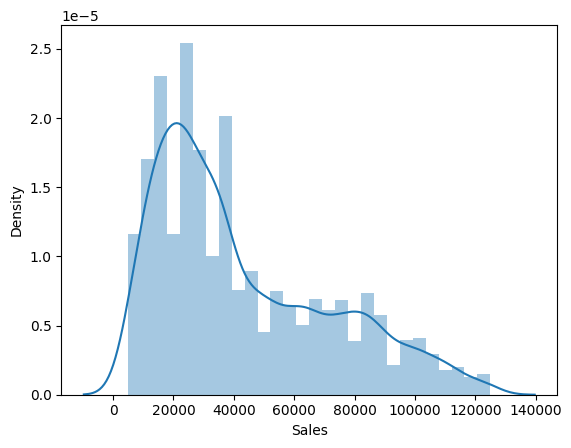

In [125]:
sns.distplot(processedDataFinal['Sales'])

<ipython-input-126-8088c28025ca>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Unit', ylabel='Density'>

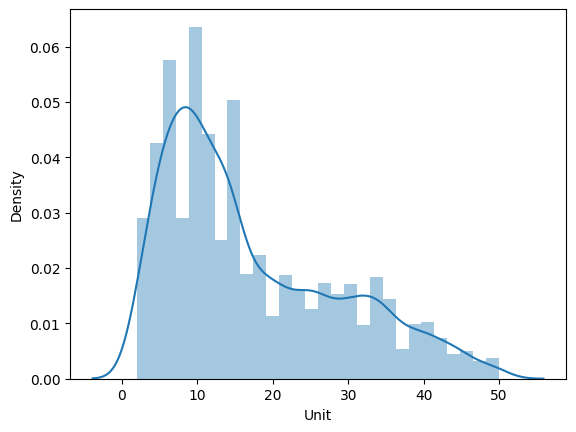

In [126]:
sns.distplot(processedDataFinal['Unit'])

In [127]:
#Share your insights regarding the application of the GroupBy() function for
#either data chunking or merging, and offer a recommendation based on
#your analysis.

#We can create a grouping of categories and apply a function to the categories.

processedDataFinal

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [128]:
processedDataFinal.groupby('Time').groups

{' Afternoon': [4, 5, 6, 7, 16, 17, 18, 19, 28, 29, 30, 31, 40, 41, 42, 43, 52, 53, 54, 55, 64, 65, 66, 67, 76, 77, 78, 79, 88, 89, 90, 91, 100, 101, 102, 103, 112, 113, 114, 115, 124, 125, 126, 127, 136, 137, 138, 139, 148, 149, 150, 151, 160, 161, 162, 163, 172, 173, 174, 175, 184, 185, 186, 187, 196, 197, 198, 199, 208, 209, 210, 211, 220, 221, 222, 223, 232, 233, 234, 235, 244, 245, 246, 247, 256, 257, 258, 259, 268, 269, 270, 271, 280, 281, 282, 283, 292, 293, 294, 295, ...], ' Evening': [8, 9, 10, 11, 20, 21, 22, 23, 32, 33, 34, 35, 44, 45, 46, 47, 56, 57, 58, 59, 68, 69, 70, 71, 80, 81, 82, 83, 92, 93, 94, 95, 104, 105, 106, 107, 116, 117, 118, 119, 128, 129, 130, 131, 140, 141, 142, 143, 152, 153, 154, 155, 164, 165, 166, 167, 176, 177, 178, 179, 188, 189, 190, 191, 200, 201, 202, 203, 212, 213, 214, 215, 224, 225, 226, 227, 236, 237, 238, 239, 248, 249, 250, 251, 260, 261, 262, 263, 272, 273, 274, 275, 284, 285, 286, 287, 296, 297, 298, 299, ...], ' Morning': [0, 1, 2, 3, 12, 

In [129]:
#Perform descriptive statistical analysis on the data in the Sales and Unit
#columns. Utilize techniques such as mean, median, mode, and standard
#deviation for this analysis.

processedDataFinal.describe()

,Unit,Sales
count,7409.00,7409.00
mean,17.19,42964.98
std,11.65,29135.36
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,25.00,62500.00
max,50.00,125000.00


In [130]:
processedDataFinal['Unit'].mean(),processedDataFinal['Unit'].median(),processedDataFinal['Unit'].mode()

(17.18599001214739,
 14.0,
 0    9
 Name: Unit, dtype: int64)

In [131]:
processedDataFinal['Sales'].mean(),processedDataFinal['Sales'].median(),processedDataFinal['Sales'].mode()

(42964.97503036847,
 35000.0,
 0    22500
 Name: Sales, dtype: int64)

In [132]:
#Identify the group with the highest sales and the group with the lowest
#sales based on the data provided.

processedDataFinal.groupby('Group').agg({'Sales': 'sum'})['Sales'].idxmax()

' Kids'

In [133]:
processedDataFinal.groupby('Group').agg({'Sales': 'sum'})['Sales'].idxmin()

' Seniors'

In [134]:
#Identify the group with the highest and lowest sales based on the data
#provided.

processedDataFinal.groupby('Group').agg({'Sales': 'sum'})['Sales']

,Sales
Group,
Kids,80200000
Men,80007500
Seniors,78262500
Women,79857500


In [135]:
sales_data=processedDataFinal

In [136]:
#Generate weekly, monthly, and quarterly reports to document and
#present the results of the analysis conducted.

sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%b-%Y')

# Set 'Date' as the index for resampling
sales_data.set_index('Date', inplace=True)

# Define a function to generate reports
def generate_reports(data, freq, group_by='State'):
    # Resample the data based on the frequency
    report = data.resample(freq).agg(
        total_sales=('Sales', 'sum'),
        total_units=('Unit', 'sum'),
        avg_sales_per_unit=('Sales', 'mean'),
        avg_units_per_transaction=('Unit', 'mean')
    )

    # Group by the specified column (e.g., State, Group)
    if group_by:
        report = data.groupby([pd.Grouper(freq=freq), group_by]).agg(
            total_sales=('Sales', 'sum'),
            total_units=('Unit', 'sum'),
            avg_sales_per_unit=('Sales', 'mean'),
            avg_units_per_transaction=('Unit', 'mean')
        ).reset_index()

    return report

# Generate weekly, monthly, and quarterly reports
weekly_report = generate_reports(sales_data, 'W', group_by=None)
monthly_report = generate_reports(sales_data, 'M')
quarterly_report = generate_reports(sales_data, 'Q')

# Display the reports
print("Weekly Report:")
print(weekly_report.head())

print("\nMonthly Report:")
print(monthly_report.head())

print("\nQuarterly Report:")
print(quarterly_report.head())

# Save reports to CSV files
#weekly_report.to_csv('C:/weekly_report.csv', index=False)
#monthly_report.to_csv('C:/monthly_report.csv', index=False)
#quarterly_report.to_csv('C:/quarterly_report.csv', index=False)


Weekly Report:
            total_sales  total_units  avg_sales_per_unit  \
Date                                                       
2020-10-04     15045000         6018            44776.79   
2020-10-11     27002500        10801            45922.62   
2020-10-18     26640000        10656            45306.12   
2020-10-25     26815000        10726            45603.74   
2020-11-01     21807500         8723            43268.85   

            avg_units_per_transaction  
Date                                   
2020-10-04                      17.91  
2020-10-11                      18.37  
2020-10-18                      18.12  
2020-10-25                      18.24  
2020-11-01                      17.31  

Monthly Report:
        Date State  total_sales  total_units  avg_sales_per_unit  \
0 2020-10-31   NSW     25007500        10003            69465.28   
1 2020-10-31    NT      8222500         3289            22840.28   
2 2020-10-31   QLD     11120000         4448            30888.8

<ipython-input-136-52e671dce718>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
#Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass keyparameters:
#State-wise sales analysis for different demographic groups (kids,women, men, and seniors).
#Group-wise sales analysis (Kids, Women, Men, and Seniors) acrossvarious states.
#Time-of-the-day analysis: Identify peak and off-peak sales periodsto facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offersto enhance sales.

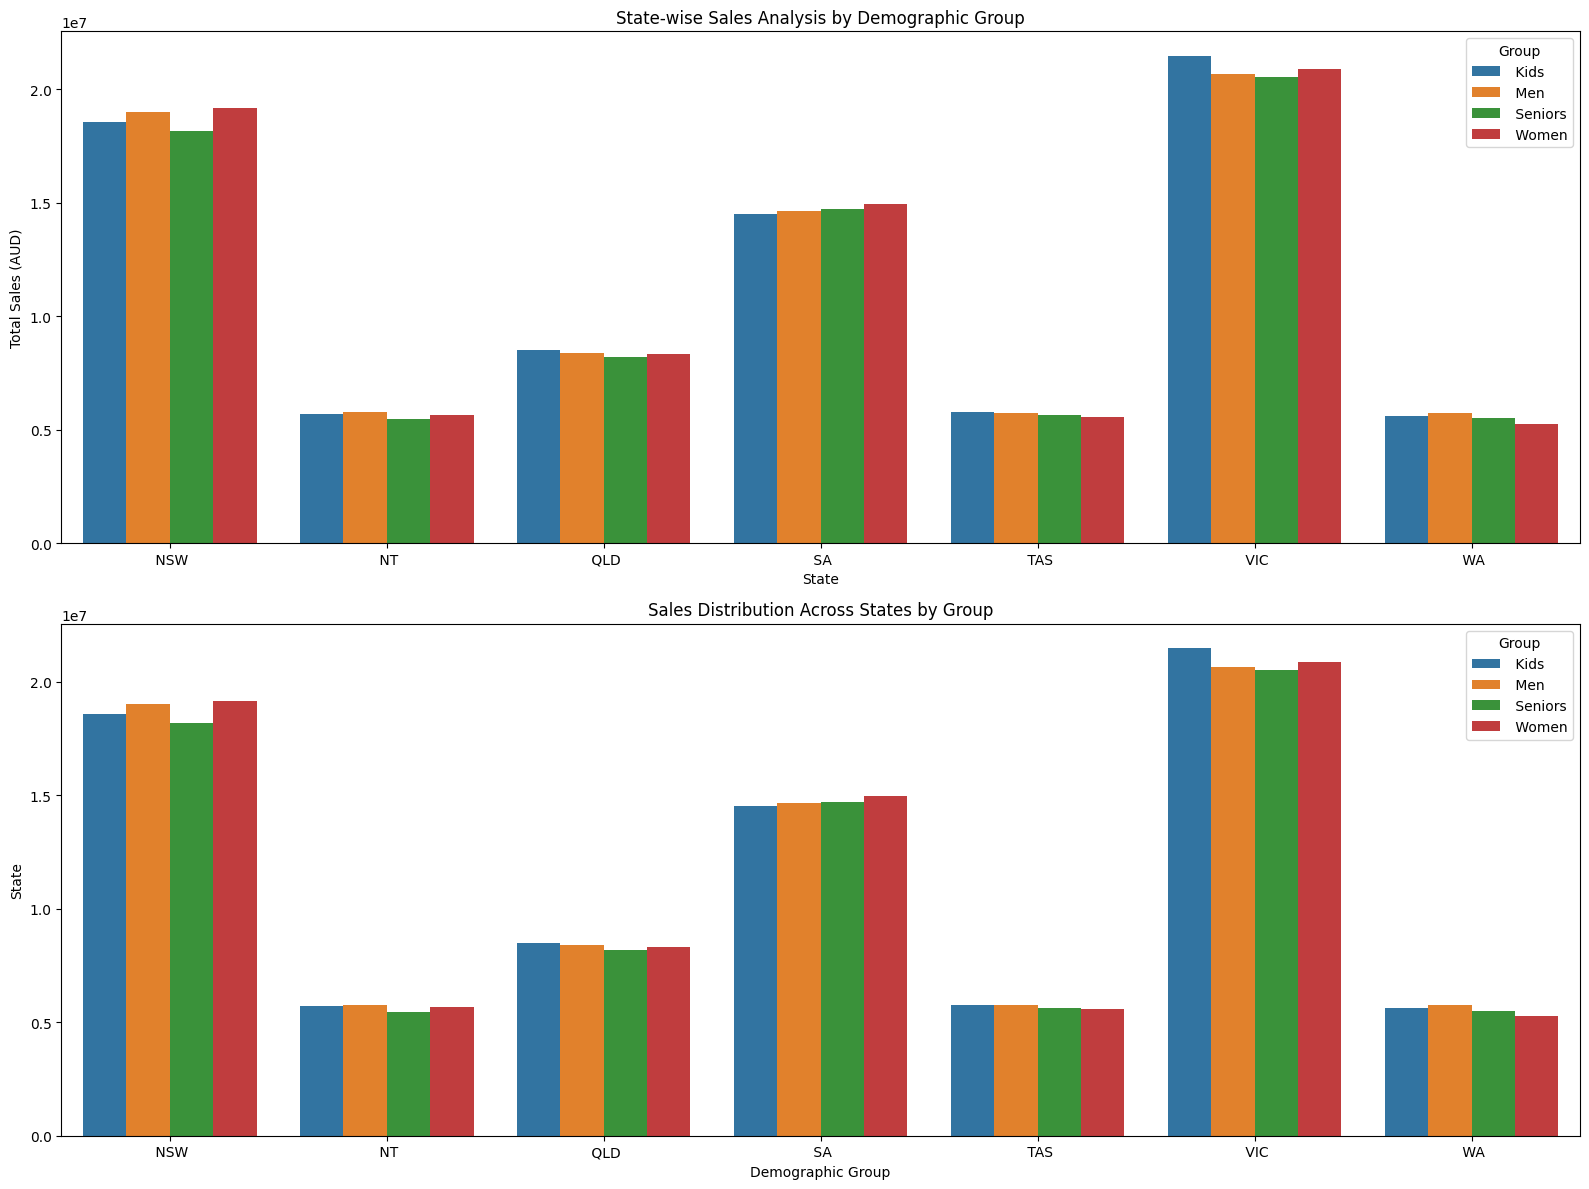

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set up the overall figure and the size for readability
plt.figure(figsize=(16, 12))

# 1. State-wise Sales Analysis for Different Demographic Groups
plt.subplot(2, 1, 1)
state_group_sales_sum = sales_data.groupby(['State', 'Group']).agg({'Sales': 'sum'}).reset_index()
sns.barplot(data=state_group_sales_sum, x='State', y='Sales', hue='Group')
plt.title('State-wise Sales Analysis by Demographic Group')
plt.ylabel('Total Sales (AUD)')
plt.xlabel('State')

# 2. Group-wise Sales Analysis Across Various States
plt.subplot(2, 1, 2)
pivot_group_sales = sales_data.groupby(['Group', 'State']).agg({'Sales': 'sum'}).reset_index()
sns.barplot(data=pivot_group_sales, x='State', y='Sales', hue='Group')
#pivot_group_sales_sorted = pivot_group_sales.sort_values(by='Sales', ascending=False)
#sns.heatmap(pivot_group_sales_sorted, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=.5)
plt.title('Sales Distribution Across States by Group')
plt.ylabel('State')
plt.xlabel('Demographic Group')

plt.tight_layout()
plt.show()

# 3. Time-of-the-Day Sales Analysis
time_of_day_sales = sales_data.groupby('Time').agg({'Sales': 'sum'}).reset_index()
time_of_day_sales_sorted = time_of_day_sales.sort_values(by='Sales', ascending=False)

fig = px.line(time_of_day_sales, x='Time', y='Sales', title='Time-of-the-Day Sales Analysis')
fig.update_layout(xaxis_title='Time of Day', yaxis_title='Total Sales (AUD)')
fig.show()


In [139]:
#Ensure the visualization is clear and accessible for effective decisionmaking by the head of sales and marketing (S&M).
#The dashboard must contain daily, weekly, monthly, and quarterly charts.


In [140]:
pip install plotly dash pandas

In [154]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

file_path = 'AusApparalSales4thQrt2020.csv'
sales_data = pd.read_csv(file_path)

# Data Preprocessing
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week

# Time parsing
def parse_time(time_str):
    try:
        # Try to parse standard time format
        return pd.to_datetime(time_str, format='%I:%M %p').hour
    except ValueError:
        # Handle cases where the time is not in a standard format
        if 'Morning' in time_str:
            return 9  # Assuming Morning is 9 AM
        elif 'Afternoon' in time_str:
            return 15  # Assuming Afternoon is 3 PM
        elif 'Evening' in time_str:
            return 18  # Assuming Evening is 6 PM
        elif 'Night' in time_str:
            return 21  # Assuming Night is 9 PM
        else:
            return 12  # Default to Noon for unspecified times

# Apply the time parsing function
sales_data['Time'] = sales_data['Time'].apply(parse_time)

# Initialize the Dash app
app = Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Sales Dashboard - Q4 2020", style={'text-align': 'center'}),

    # Date range picker
    dcc.DatePickerRange(
        id='date-range',
        min_date_allowed=sales_data['Date'].min(),
        max_date_allowed=sales_data['Date'].max(),
        start_date=sales_data['Date'].min(),
        end_date=sales_data['Date'].max(),
        display_format='YYYY-MM-DD',
    ),

    # State-wise Sales Analysis
    dcc.Graph(id='state-group-sales'),

    # Group-wise Sales Analysis
    dcc.Graph(id='group-state-sales'),

    # Time-of-Day Analysis
    dcc.Graph(id='time-of-day-sales'),

    # Daily Sales
    dcc.Graph(id='daily-sales'),

    # Weekly Sales
    dcc.Graph(id='weekly-sales'),

    # Monthly Sales
    dcc.Graph(id='monthly-sales'),

    # Quarterly Sales Breakdown
    dcc.Graph(id='quarterly-sales-breakdown'),
])

# Callbacks for interactive updates
@app.callback(
    Output('state-group-sales', 'figure'),
    Output('group-state-sales', 'figure'),
    Output('time-of-day-sales', 'figure'),
    Output('daily-sales', 'figure'),
    Output('weekly-sales', 'figure'),
    Output('monthly-sales', 'figure'),
    Output('quarterly-sales-breakdown', 'figure'),
    Input('date-range', 'start_date'),
    Input('date-range', 'end_date')
)
def update_dashboard(start_date, end_date):
    # Filter data by date range
    filtered_data = sales_data[(sales_data['Date'] >= start_date) & (sales_data['Date'] <= end_date)]

    # State-wise Sales Analysis
    state_group_sales = filtered_data.groupby(['State', 'Group']).agg({'Sales': 'sum'}).reset_index()
    state_group_fig = px.bar(state_group_sales, x='State', y='Sales', color='Group',
                             title='State-wise Sales Analysis by Demographic Group',
                             labels={'Sales': 'Total Sales (AUD)', 'State': 'State'},
                             barmode='group')

    # Group-wise Sales Analysis
    group_state_sales = filtered_data.groupby(['Group', 'State']).agg({'Sales': 'sum'}).reset_index()
    group_state_fig = px.bar(group_state_sales, x='Group', y='Sales', color='State',
                             title='Group-wise Sales Analysis Across States',
                             labels={'Sales': 'Total Sales (AUD)', 'Group': 'Demographic Group'},
                             barmode='group')

    # Time-of-Day Sales Analysis
    time_sales = filtered_data.groupby('Time').agg({'Sales': 'sum'}).reset_index()
    time_of_day_fig = px.line(time_sales, x='Time', y='Sales', markers=True,
                              title='Time-of-Day Sales Analysis',
                              labels={'Sales': 'Total Sales (AUD)', 'Time': 'Hour of the Day'})

    # Daily Sales
    daily_sales = filtered_data.groupby('Date').agg({'Sales': 'sum'}).reset_index()
    daily_sales_fig = px.line(daily_sales, x='Date', y='Sales', markers=True,
                              title='Daily Sales')

    # Weekly Sales
    weekly_sales = filtered_data.groupby('Week').agg({'Sales': 'sum'}).reset_index()
    weekly_sales_fig = px.bar(weekly_sales, x='Week', y='Sales',
                              title='Weekly Sales')

    # Monthly Sales
    monthly_sales = filtered_data.groupby('Month').agg({'Sales': 'sum'}).reset_index()
    monthly_sales_fig = px.line(monthly_sales, x='Month', y='Sales', markers=True,
                                title='Monthly Sales')

    # Quarterly Sales Breakdown
    quarterly_sales = filtered_data.groupby(['State', 'Group']).agg({'Sales': 'sum'}).reset_index()
    quarterly_sales_fig = px.sunburst(quarterly_sales, path=['State', 'Group'], values='Sales',
                                      title='Quarterly Sales Breakdown by State and Group')

    return state_group_fig, group_state_fig, time_of_day_fig, daily_sales_fig, weekly_sales_fig, monthly_sales_fig, quarterly_sales_fig

# Run the app
if __name__ == '__main__':
  app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
#Include your recommendation and indicate why you are choosing the
#recommended visualization package.

By using Plotly and Dash, you can create a robust, interactive dashboard that allows the head of sales and marketing to explore data in real-time, make informed decisions, and gain insights into the company's performance across different states, demographic groups, and time periods. The flexibility and power of these tools make them the ideal choice for this task.